In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
gb_cb_cv = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1))

In [7]:
gb_cb = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb)

In [8]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [9]:
cat = evaluate_model(cb, X, y)

In [10]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [11]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [12]:
g = evaluate_model(gb, X, y)

In [13]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [14]:
g

,gb_score
0,0.914384
1,0.831491
2,0.917112
3,0.910775
4,0.928567
5,0.909586
6,0.926628
7,0.895272
8,0.928754
9,0.836306


In [15]:
GB_CB_CV = evaluate_model(gb_cb_cv, X, y)

In [16]:
GB_CB_CV = GB_CB_CV[['test_score']].rename(columns={'test_score':'GB_CB_CV'})

In [17]:
GB_CB_CV

,GB_CB_CV
0,0.912632
1,0.881555
2,0.911555
3,0.894951
4,0.918927
5,0.908948
6,0.920735
7,0.884580
8,0.917763
9,0.873386


In [18]:
GB_CB = evaluate_model(gb_cb, X, y)

In [19]:
GB_CB = GB_CB[['test_score']].rename(columns={'test_score':'GB_CB'})

In [20]:
GB_CB

,GB_CB
0,0.908008
1,0.888381
2,0.910051
3,0.891292
4,0.919169
5,0.906008
6,0.911658
7,0.896330
8,0.924718
9,0.881953


In [21]:
combo = pd.concat([cat, g, GB_CB_CV, GB_CB], axis=1)

In [22]:
combo

,cat_score,gb_score,GB_CB_CV,GB_CB
0,0.920566,0.914384,0.912632,0.908008
1,0.899820,0.831491,0.881555,0.888381
2,0.938045,0.917112,0.911555,0.910051
3,0.933383,0.910775,0.894951,0.891292
4,0.949361,0.928567,0.918927,0.919169
5,0.934502,0.909586,0.908948,0.906008
6,0.944618,0.926628,0.920735,0.911658
7,0.924652,0.895272,0.884580,0.896330
8,0.947610,0.928754,0.917763,0.924718
9,0.883656,0.836306,0.873386,0.881953


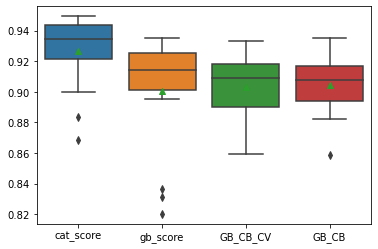

In [23]:
sns.boxplot(data=combo, showmeans=True);

In [24]:
combo.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB
count,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.902936,0.904674
std,0.024378,0.038179,0.020746,0.019582
min,0.868666,0.820084,0.859218,0.858424
25%,0.921228,0.901359,0.889765,0.893811
50%,0.934502,0.914384,0.908948,0.908008
75%,0.943737,0.925660,0.918345,0.917019
max,0.949361,0.935113,0.933282,0.935413


In [27]:
ordinald1 = pd.read_csv('../../Isolation Forest/OrdinalDrop1.csv')
ordinald1.shape

(2579, 81)

In [28]:
ordinald1 = ordinald1.drop(['Unnamed: 0'], axis=1)
ordinald1.shape

(2579, 80)

In [29]:
X1 = ordinald1.drop(['SalePrice'], axis=1)
y1 = ordinald1.SalePrice

In [30]:
catd1 = evaluate_model(cb, X1, y1)

In [31]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [32]:
catd1

,catd1_score
0,0.929560
1,0.948942
2,0.943433
3,0.913321
4,0.951898
5,0.933712
6,0.932560
7,0.927932
8,0.949594
9,0.940376


In [33]:
gd1 = evaluate_model(gb, X1, y1)

In [34]:
gd1 = gd1[['test_score']].rename(columns={'test_score':'gbd1_score'})

In [35]:
gd1

,gbd1_score
0,0.911278
1,0.938055
2,0.934433
3,0.896948
4,0.939217
5,0.908808
6,0.926451
7,0.917490
8,0.944368
9,0.924041


In [36]:
GB_CB_CV_d1 = evaluate_model(gb_cb_cv, X1, y1)

In [37]:
GB_CB_CV_d1 = GB_CB_CV_d1[['test_score']].rename(columns={'test_score':'GB_CB_CV_d1'})

In [38]:
GB_CB_CV_d1

,GB_CB_CV_d1
0,0.906211
1,0.936388
2,0.919039
3,0.881162
4,0.924533
5,0.899521
6,0.918902
7,0.912854
8,0.933898
9,0.923729


In [39]:
GB_CB_d1 = evaluate_model(gb_cb, X1, y1)

In [40]:
GB_CB_d1 = GB_CB_d1[['test_score']].rename(columns={'test_score':'GB_CB_d1'})

In [41]:
GB_CB_d1

,GB_CB_d1
0,0.906443
1,0.929683
2,0.916932
3,0.889974
4,0.926934
5,0.890669
6,0.916244
7,0.905746
8,0.934936
9,0.920332


In [42]:
combo_d1 = pd.concat([cat, g, GB_CB_CV, GB_CB, catd1, gd1, GB_CB_CV_d1, GB_CB_d1], axis=1)

In [43]:
combo_d1

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
0,0.920566,0.914384,0.912632,0.908008,0.929560,0.911278,0.906211,0.906443
1,0.899820,0.831491,0.881555,0.888381,0.948942,0.938055,0.936388,0.929683
2,0.938045,0.917112,0.911555,0.910051,0.943433,0.934433,0.919039,0.916932
3,0.933383,0.910775,0.894951,0.891292,0.913321,0.896948,0.881162,0.889974
4,0.949361,0.928567,0.918927,0.919169,0.951898,0.939217,0.924533,0.926934
5,0.934502,0.909586,0.908948,0.906008,0.933712,0.908808,0.899521,0.890669
6,0.944618,0.926628,0.920735,0.911658,0.932560,0.926451,0.918902,0.916244
7,0.924652,0.895272,0.884580,0.896330,0.927932,0.917490,0.912854,0.905746
8,0.947610,0.928754,0.917763,0.924718,0.949594,0.944368,0.933898,0.934936
9,0.883656,0.836306,0.873386,0.881953,0.940376,0.924041,0.923729,0.920332


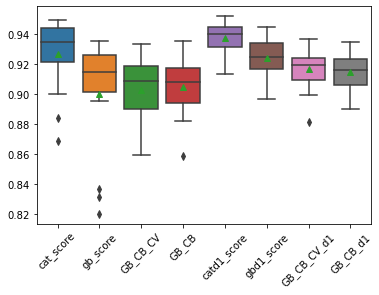

In [44]:
sns.boxplot(data=combo_d1, showmeans=True).tick_params(axis='x', labelrotation=45);

In [45]:
combo_d1.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.902936,0.904674,0.937229,0.924295,0.916329,0.914687
std,0.024378,0.038179,0.020746,0.019582,0.010685,0.012871,0.013900,0.013275
min,0.868666,0.820084,0.859218,0.858424,0.913321,0.896948,0.881162,0.889974
25%,0.921228,0.901359,0.889765,0.893811,0.931060,0.916966,0.909533,0.906298
50%,0.934502,0.914384,0.908948,0.908008,0.940292,0.924766,0.919039,0.916244
75%,0.943737,0.925660,0.918345,0.917019,0.944545,0.934100,0.924131,0.923633
max,0.949361,0.935113,0.933282,0.935413,0.951898,0.944368,0.936388,0.934936


In [47]:
ordinald2 = pd.read_csv('../../Isolation Forest/OrdinalDrop2.csv')
ordinald2.shape

(2578, 81)

In [48]:
ordinald2 = ordinald2.drop(['Unnamed: 0'], axis=1)
ordinald2.shape

(2578, 80)

In [49]:
X2 = ordinald2.drop(['SalePrice'], axis=1)
y2 = ordinald2.SalePrice

In [50]:
catd2 = evaluate_model(cb, X2, y2)

In [51]:
catd2 = catd2[['test_score']].rename(columns={'test_score':'catd2_score'})

In [52]:
catd2

,catd2_score
0,0.930887
1,0.944960
2,0.951659
3,0.920369
4,0.946070
5,0.936118
6,0.943526
7,0.933982
8,0.943425
9,0.942207


In [53]:
gd2 = evaluate_model(gb, X2, y2)

In [54]:
gd2 = gd2[['test_score']].rename(columns={'test_score':'gbd2_score'})

In [55]:
gd2

,gbd2_score
0,0.918969
1,0.920905
2,0.935142
3,0.902607
4,0.935049
5,0.915168
6,0.931671
7,0.923249
8,0.943156
9,0.921449


In [56]:
GB_CB_CV_d2 = evaluate_model(gb_cb_cv, X2, y2)

In [57]:
GB_CB_CV_d2 = GB_CB_CV_d2[['test_score']].rename(columns={'test_score':'GB_CB_CV_d2'})

In [58]:
GB_CB_CV_d2

,GB_CB_CV_d2
0,0.914075
1,0.928524
2,0.926375
3,0.892833
4,0.925592
5,0.912436
6,0.926192
7,0.921769
8,0.942897
9,0.920855


In [59]:
GB_CB_d2 = evaluate_model(gb_cb, X2, y2)

In [60]:
GB_CB_d2 = GB_CB_d2[['test_score']].rename(columns={'test_score':'GB_CB_d2'})

In [61]:
GB_CB_d2

,GB_CB_d2
0,0.910219
1,0.923223
2,0.926997
3,0.896249
4,0.935436
5,0.906327
6,0.928600
7,0.922617
8,0.937439
9,0.916194


In [62]:
combo_d2 = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2], axis=1)

In [63]:
combo_d2

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
0,0.920566,0.914384,0.912632,0.908008,0.929560,0.911278,0.906211,0.906443,0.930887,0.918969,0.914075,0.910219
1,0.899820,0.831491,0.881555,0.888381,0.948942,0.938055,0.936388,0.929683,0.944960,0.920905,0.928524,0.923223
2,0.938045,0.917112,0.911555,0.910051,0.943433,0.934433,0.919039,0.916932,0.951659,0.935142,0.926375,0.926997
3,0.933383,0.910775,0.894951,0.891292,0.913321,0.896948,0.881162,0.889974,0.920369,0.902607,0.892833,0.896249
4,0.949361,0.928567,0.918927,0.919169,0.951898,0.939217,0.924533,0.926934,0.946070,0.935049,0.925592,0.935436
5,0.934502,0.909586,0.908948,0.906008,0.933712,0.908808,0.899521,0.890669,0.936118,0.915168,0.912436,0.906327
6,0.944618,0.926628,0.920735,0.911658,0.932560,0.926451,0.918902,0.916244,0.943526,0.931671,0.926192,0.928600
7,0.924652,0.895272,0.884580,0.896330,0.927932,0.917490,0.912854,0.905746,0.933982,0.923249,0.921769,0.922617
8,0.947610,0.928754,0.917763,0.924718,0.949594,0.944368,0.933898,0.934936,0.943425,0.943156,0.942897,0.937439
9,0.883656,0.836306,0.873386,0.881953,0.940376,0.924041,0.923729,0.920332,0.942207,0.921449,0.920855,0.916194


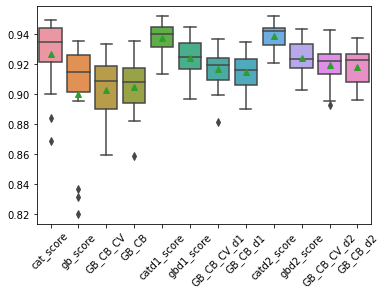

In [64]:
sns.boxplot(data=combo_d2, showmeans=True).tick_params(axis='x', labelrotation=45);

In [65]:
combo_d2.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.902936,0.904674,0.937229,0.924295,0.916329,0.914687,0.938917,0.923834,0.919061,0.918224
std,0.024378,0.038179,0.020746,0.019582,0.010685,0.012871,0.013900,0.013275,0.008475,0.011663,0.014078,0.013340
min,0.868666,0.820084,0.859218,0.858424,0.913321,0.896948,0.881162,0.889974,0.920369,0.902607,0.892833,0.896249
25%,0.921228,0.901359,0.889765,0.893811,0.931060,0.916966,0.909533,0.906298,0.932435,0.917068,0.913256,0.908273
50%,0.934502,0.914384,0.908948,0.908008,0.940292,0.924766,0.919039,0.916244,0.942207,0.923249,0.921769,0.922617
75%,0.943737,0.925660,0.918345,0.917019,0.944545,0.934100,0.924131,0.923633,0.944243,0.933360,0.926795,0.926925
max,0.949361,0.935113,0.933282,0.935413,0.951898,0.944368,0.936388,0.934936,0.951659,0.943156,0.942897,0.937439


In [67]:
ordinalIF = pd.read_csv('../../Isolation Forest/OrdinalDropIF.csv')
ordinalIF.shape

(2579, 83)

In [68]:
ordinalIF = ordinalIF.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF.shape

(2579, 80)

In [69]:
XIF = ordinalIF.drop(['SalePrice'], axis=1)
yIF = ordinalIF.SalePrice

In [70]:
catIF = evaluate_model(cb, XIF, yIF)

In [71]:
catIF = catIF[['test_score']].rename(columns={'test_score':'catIF_score'})

In [72]:
catIF

,catIF_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [73]:
gIF = evaluate_model(gb, XIF, yIF)

In [74]:
gIF = gIF[['test_score']].rename(columns={'test_score':'gIF_score'})

In [75]:
gIF

,gIF_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [76]:
GB_CB_CV_IF = evaluate_model(gb_cb_cv, XIF, yIF)

In [77]:
GB_CB_CV_IF = GB_CB_CV_IF[['test_score']].rename(columns={'test_score':'GB_CB_CV_IF_score'})

In [78]:
GB_CB_CV_IF

,GB_CB_CV_IF_score
0,0.898799
1,0.937914
2,0.920150
3,0.886517
4,0.926007
5,0.907678
6,0.913302
7,0.911904
8,0.944573
9,0.911271


In [79]:
GB_CB_IF = evaluate_model(gb_cb, XIF, yIF)

In [80]:
GB_CB_IF = GB_CB_IF[['test_score']].rename(columns={'test_score':'GB_CB_IF_score'})

In [81]:
GB_CB_IF

,GB_CB_IF_score
0,0.903279
1,0.932360
2,0.923163
3,0.885200
4,0.923622
5,0.903414
6,0.906899
7,0.911050
8,0.945082
9,0.916927


In [82]:
combo_IF = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2,
                      catIF, gIF, GB_CB_CV_IF, GB_CB_IF], axis=1)

In [83]:
combo_IF

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score
0,0.920566,0.914384,0.912632,0.908008,0.929560,0.911278,0.906211,0.906443,0.930887,0.918969,0.914075,0.910219,0.931308,0.908753,0.898799,0.903279
1,0.899820,0.831491,0.881555,0.888381,0.948942,0.938055,0.936388,0.929683,0.944960,0.920905,0.928524,0.923223,0.946897,0.939744,0.937914,0.932360
2,0.938045,0.917112,0.911555,0.910051,0.943433,0.934433,0.919039,0.916932,0.951659,0.935142,0.926375,0.926997,0.946280,0.936716,0.920150,0.923163
3,0.933383,0.910775,0.894951,0.891292,0.913321,0.896948,0.881162,0.889974,0.920369,0.902607,0.892833,0.896249,0.911824,0.895961,0.886517,0.885200
4,0.949361,0.928567,0.918927,0.919169,0.951898,0.939217,0.924533,0.926934,0.946070,0.935049,0.925592,0.935436,0.949900,0.937107,0.926007,0.923622
5,0.934502,0.909586,0.908948,0.906008,0.933712,0.908808,0.899521,0.890669,0.936118,0.915168,0.912436,0.906327,0.933133,0.915868,0.907678,0.903414
6,0.944618,0.926628,0.920735,0.911658,0.932560,0.926451,0.918902,0.916244,0.943526,0.931671,0.926192,0.928600,0.929582,0.923176,0.913302,0.906899
7,0.924652,0.895272,0.884580,0.896330,0.927932,0.917490,0.912854,0.905746,0.933982,0.923249,0.921769,0.922617,0.926053,0.919474,0.911904,0.911050
8,0.947610,0.928754,0.917763,0.924718,0.949594,0.944368,0.933898,0.934936,0.943425,0.943156,0.942897,0.937439,0.950737,0.941296,0.944573,0.945082
9,0.883656,0.836306,0.873386,0.881953,0.940376,0.924041,0.923729,0.920332,0.942207,0.921449,0.920855,0.916194,0.939564,0.921069,0.911271,0.916927


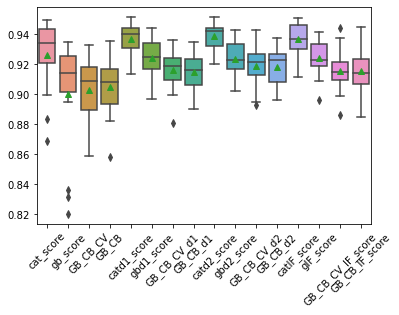

In [84]:
sns.boxplot(data=combo_IF, showmeans=True).tick_params(axis='x', labelrotation=45);

In [85]:
combo_IF.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.902936,0.904674,0.937229,0.924295,0.916329,0.914687,0.938917,0.923834,0.919061,0.918224,0.936878,0.924317,0.915572,0.915435
std,0.024378,0.038179,0.020746,0.019582,0.010685,0.012871,0.013900,0.013275,0.008475,0.011663,0.014078,0.013340,0.011131,0.012277,0.014356,0.014064
min,0.868666,0.820084,0.859218,0.858424,0.913321,0.896948,0.881162,0.889974,0.920369,0.902607,0.892833,0.896249,0.911824,0.895961,0.886517,0.885200
25%,0.921228,0.901359,0.889765,0.893811,0.931060,0.916966,0.909533,0.906298,0.932435,0.917068,0.913256,0.908273,0.930445,0.918784,0.909475,0.907082
50%,0.934502,0.914384,0.908948,0.908008,0.940292,0.924766,0.919039,0.916244,0.942207,0.923249,0.921769,0.922617,0.936986,0.923176,0.914928,0.914469
75%,0.943737,0.925660,0.918345,0.917019,0.944545,0.934100,0.924131,0.923633,0.944243,0.933360,0.926795,0.926925,0.946589,0.933732,0.921432,0.923307
max,0.949361,0.935113,0.933282,0.935413,0.951898,0.944368,0.936388,0.934936,0.951659,0.943156,0.942897,0.937439,0.950737,0.941296,0.944573,0.945082
